In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("../data/interim/cars.csv")
print(df.shape)
df.head(10)

(37705, 16)


,make,model,transmission,color,mileage,year,fuel,engine_capacity,body_type,has_warranty,drivetrain,price,age,miles_per_year,price_per_mile,price_per_year
0,subaru,outback,automatic,silver,190000,2010,gasoline,2.5,universal,False,all,10900.00,15,12666.666667,0.057368,726.666667
1,subaru,outback,automatic,blue,290000,2002,gasoline,3.0,universal,False,all,5000.00,23,12608.695652,0.017241,217.391304
2,subaru,forester,automatic,red,402000,2001,gasoline,2.5,suv,False,all,2800.00,24,16750.000000,0.006965,116.666667
3,subaru,impreza,mechanical,blue,10000,1999,gasoline,3.0,sedan,False,all,9999.00,26,384.615385,0.999900,384.576923
4,subaru,legacy,automatic,black,280000,2001,gasoline,2.5,universal,False,all,2134.11,24,11666.666667,0.007622,88.921250
5,subaru,outback,automatic,silver,132449,2011,gasoline,2.5,universal,False,all,14700.00,14,9460.642857,0.110986,1050.000000
6,subaru,forester,automatic,black,318280,1998,gasoline,2.5,universal,False,all,3000.00,27,11788.148148,0.009426,111.111111
7,subaru,legacy,automatic,silver,350000,2004,gasoline,2.5,sedan,False,all,4500.00,21,16666.666667,0.012857,214.285714
8,subaru,outback,automatic,grey,179000,2010,gasoline,2.5,universal,False,all,12900.00,15,11933.333333,0.072067,860.000000
9,subaru,forester,automatic,silver,571317,1999,gasoline,2.5,universal,False,all,4200.00,26,21973.730769,0.007351,161.538462


In [27]:
X = df.drop(columns=['price',  'price_per_mile', 'price_per_year'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
numeric_features = ['mileage', 'year', 'engine_capacity', 'age', 'miles_per_year']
numeric_transformer = StandardScaler()


categorical_features = ['make', 'model', 'transmission', 'color', 'fuel', 'body_type', 'drivetrain', 'has_warranty']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [38]:
X_train_processed = preprocessor.fit_transform(X_train)  # Fit and transform on training data
X_test_processed = preprocessor.transform(X_test)    

/home/u03n0/Workspace/used-cars/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [39]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [40]:
y_pred = model.fit(X_train_processed, y_train).predict(X_train_processed)

# Print model performance
print("\nSimple Linear Regression Model:")
print(f"R-squared: {r2_score(y_train, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred)):.2f}")


Simple Linear Regression Model:
R-squared: 0.84
RMSE: 2443.60


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


In [44]:
results = {}

# Test each model
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train and evaluate
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[name] = {
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

/home/u03n0/Workspace/used-cars/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/u03n0/Workspace/used-cars/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/u03n0/Workspace/used-cars/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/u03n0/Workspace/used-cars/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/u0


Model Performance Comparison:
                         R²         RMSE          MAE
Linear Regression  0.792666  2821.326464  1670.508299
Ridge Regression   0.792977  2819.209133  1683.682497
Lasso Regression   0.757247  3052.814167  1833.194799
Elastic Net        0.610858  3865.205130  2324.310808
Decision Tree      0.850215  2398.018356  1337.727312
Random Forest      0.904978  1909.986542  1055.146054
Gradient Boosting  0.869355  2239.566828  1358.459739
SVR                0.220685  5469.844514  3115.252811
KNN                0.866644  2262.683852  1277.954921


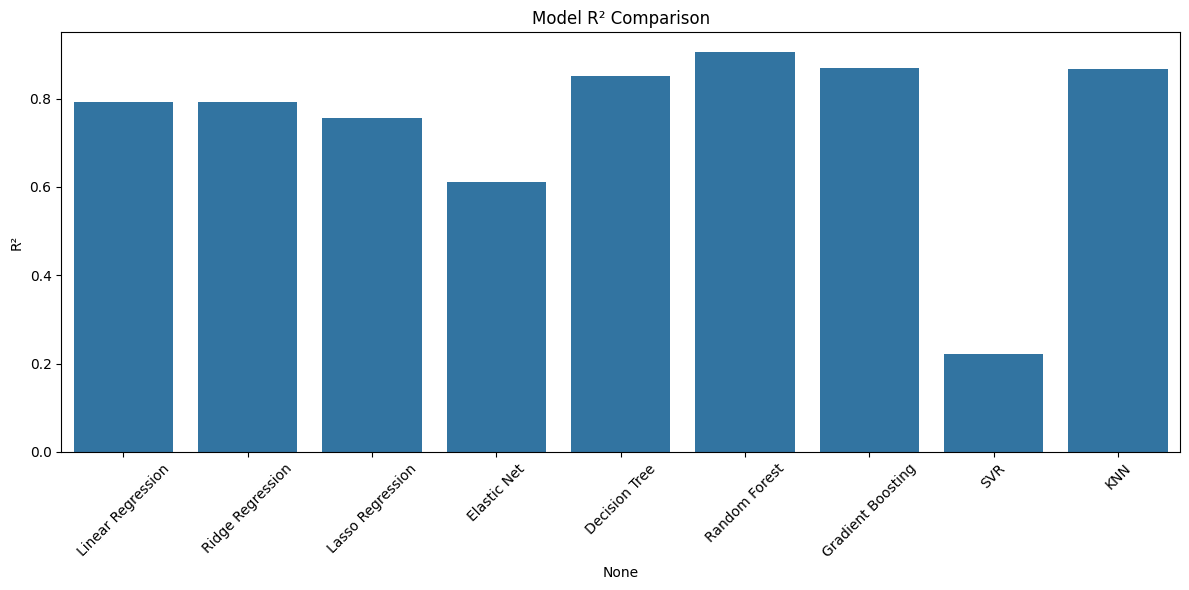

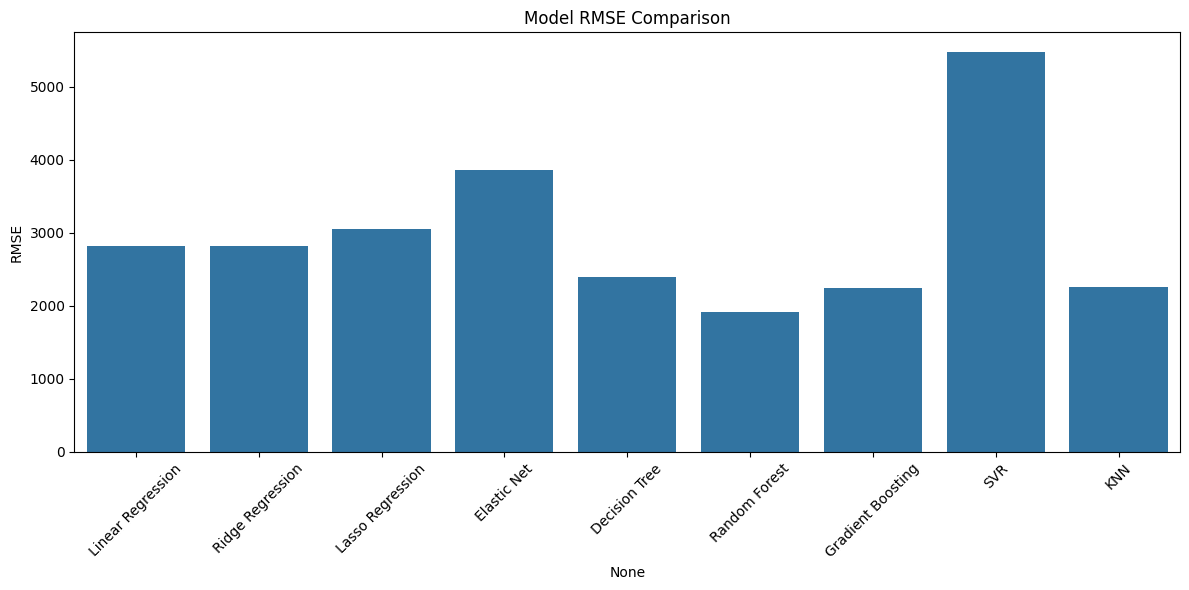

In [45]:
# Visualize model performance
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['R²'])
plt.title('Model R² Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title('Model RMSE Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()